In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import normalize, minmax_scale

In [4]:
# All the data
outcomes = pd.read_csv("data/public_school_rankings_by_state.csv", thousands=',')
spending = pd.read_csv("data/per_pupil_spending_by_state.csv", thousands=',')
family_income = pd.read_csv("data/average_family_income.csv", thousands=",")
cost_of_living = pd.read_csv("data/cost_of_living.csv", thousands=",")

df = pd.merge(outcomes[["state","publicSchoolScore"]],cost_of_living[["state","costIndex"]])
df = pd.merge(df,spending[["state","amountPerPupil"]])
df["normSpending"] = minmax_scale(df["amountPerPupil"]/df["costIndex"])
df = pd.merge(df,family_income[["state","FamiliesMedianIncome"]])
df["normIncome"] = minmax_scale(df["FamiliesMedianIncome"]/df["costIndex"])
df.sort_values("costIndex")

# get outta here stupid dc
spending = spending[spending['state'].ne('District of Columbia')]
family_income = family_income[family_income['state'].ne('District of Columbia')]
cost_of_living = cost_of_living[cost_of_living['state'].ne('District of Columbia')]


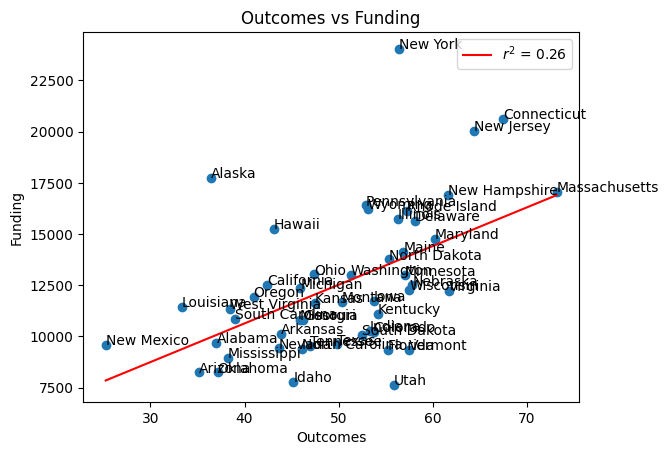

In [6]:

# Let's do a scatter plot of outcomes vs funding!
x = df['publicSchoolScore']
y = df['amountPerPupil']
states = df['state']
plt.scatter(x, y)

# Add some labels
plt.xlabel('Outcomes')
plt.ylabel('Funding')
plt.title('Outcomes vs Funding')
for i in range(0,len(x)):
    plt.text(x[i], y[i], states[i])

# Throw a trendline on there
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
# r2 score explains variance
r2 = r2_score(y,p(x))

plt.plot(x, p(x), color="red", label=f"$r^2$ = {r2:0.2f}")

plt.legend()
plt.show()

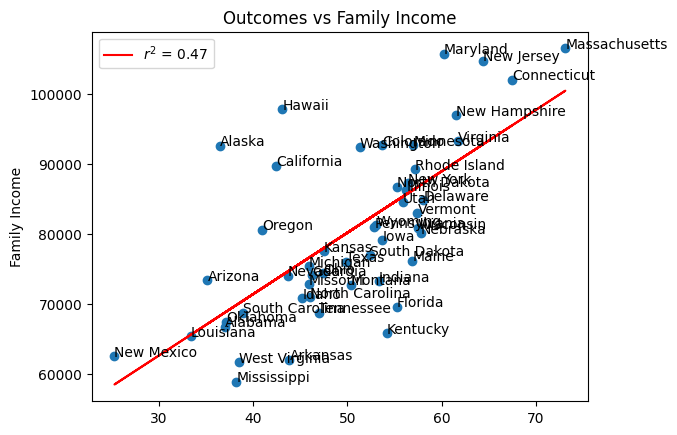

In [38]:
# Outcomes vs family income
y = df['FamiliesMedianIncome']
plt.scatter(x, y)

# Add some labels
plt.ylabel('Family Income')
plt.title('Outcomes vs Family Income')
for i in range(0,len(x)):
    plt.text(x[i], y[i], states[i])

# Throw a trendline on there
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
# r2 score explains variance
r2 = r2_score(y,p(x))

plt.plot(x, p(x), color="red", label=f"$r^2$ = {r2:0.2f}")

plt.legend()
plt.show()

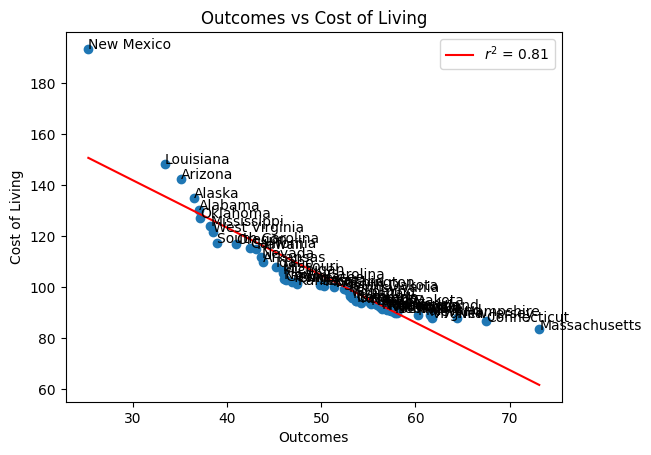

In [7]:

# Outcomes vs cost of living
y = df['costIndex']
plt.scatter(x, y)

# Add some labels
plt.xlabel('Outcomes')
plt.ylabel('Cost of Living')
plt.title('Outcomes vs Cost of Living')
for i in range(0,len(x)):
    plt.text(x[i], y[i], states[i])

# Throw a trendline on there
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
# r2 score explains variance
r2 = r2_score(y,p(x))

plt.plot(x, p(x), color="red", label=f"$r^2$ = {r2:0.2f}")

plt.legend()
plt.show()

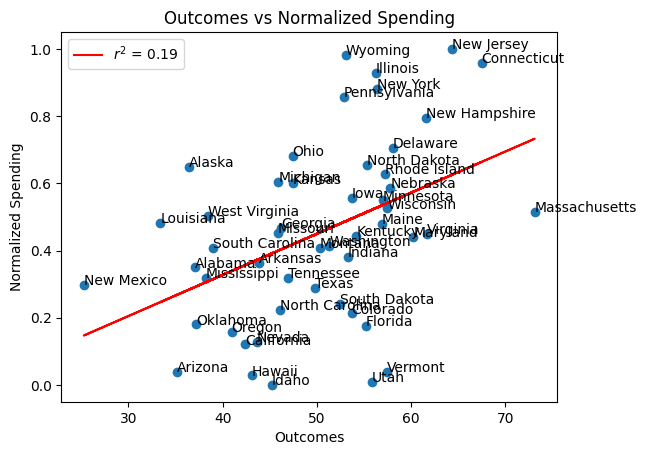

In [114]:
# Outcomes vs normalized spending
y = minmax_scale(df["amountPerPupil"]/df["costIndex"])
states = df['state']
plt.scatter(x, y)

# Add some labels
plt.xlabel('Outcomes')
plt.ylabel('Normalized Spending')
plt.title('Outcomes vs Normalized Spending')
for i in range(0,len(x)):
    plt.text(x[i], y[i], states[i])

# Throw a trendline on there
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
# r2 score explains variance
r2 = r2_score(y,p(x))

plt.plot(x, p(x), color="red", label=f"$r^2$ = {r2:0.2f}")

plt.legend()
plt.show()

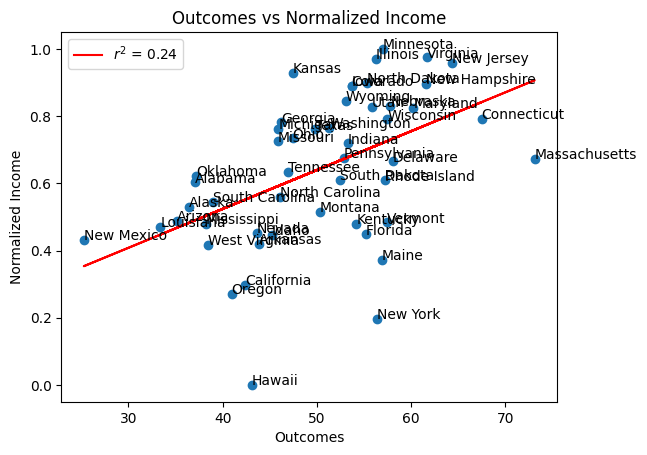

In [104]:
# Outcomes vs normalized family income
y = minmax_scale(family_income["FamiliesMedianIncome"].to_numpy()/cost_of_living["costIndex"].to_numpy())
states = outcomes['state'].to_numpy()
plt.scatter(x, y)

# Add some labels
plt.xlabel('Outcomes')
plt.ylabel('Normalized Income')
plt.title('Outcomes vs Normalized Income')
for i in range(0,len(x)):
    plt.text(x[i], y[i], states[i])

# Throw a trendline on there
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
# r2 score explains variance
r2 = r2_score(y,p(x))

plt.plot(x, p(x), color="red", label=f"$r^2$ = {r2:0.2f}")

plt.legend()
plt.show()